In [1]:
# command to view figures in Jupyter notebook
%matplotlib widget 

# import plotting module 
import matplotlib.pyplot as plt 

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 18 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 20 # fontsize for figure titles
plt.rcParams['font.size'] = 16 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.6 # line width for plotting
plt.rcParams.update({'font.size': 14})

import math
import numpy as np
import scipy as sc
from scipy import signal
from scipy.signal import butter, lfilter, filtfilt
import pandas as pd
import tkinter as tk
import statistics
import neurokit2 as nk
from pysiology import electromyography

Thank you for using Pysiology. If you use it in your work, please cite:
Gabrieli G., Azhari A., Esposito G. (2020) PySiology: A Python Package for Physiological Feature Extraction. In: Esposito A., Faundez-Zanuy M., Morabito F., Pasero E. (eds) Neural Approaches to Dynamics of Signal Exchanges. Smart Innovation, Systems and Technologies, vol 151. Springer, Singapore. https://doi.org/10.1007/978-981-13-8950-4_35


In [2]:
Data_off = pd.read_csv('.csv') #path to file
Data_on = pd.read_csv('.csv') #path to file
Sample_frequensy = 1259
Data_off

,Timestamp,Flexor carpi radialis,Extensor digitorum
0,2.000000,0.000126,0.000015
1,2.000794,0.000121,0.000046
2,2.001587,0.000085,0.000063
3,2.002381,0.000020,0.000057
4,2.003175,-0.000065,0.000029
...,...,...,...
23936,20.996825,-0.000051,-0.000213
23937,20.997619,-0.000046,-0.000150
23938,20.998413,-0.000046,-0.000077
23939,20.999206,-0.000050,-0.000006


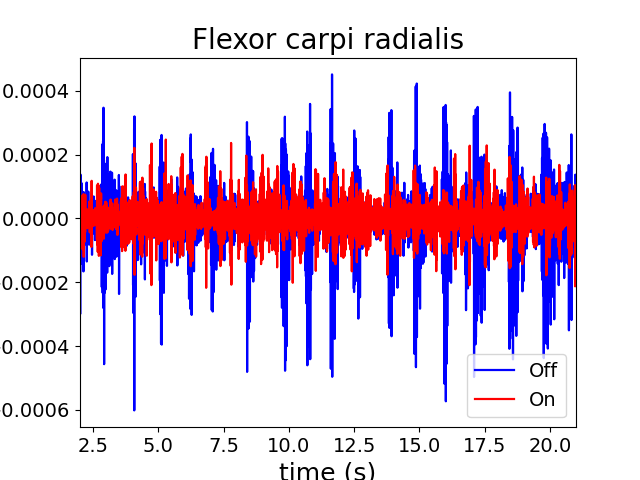

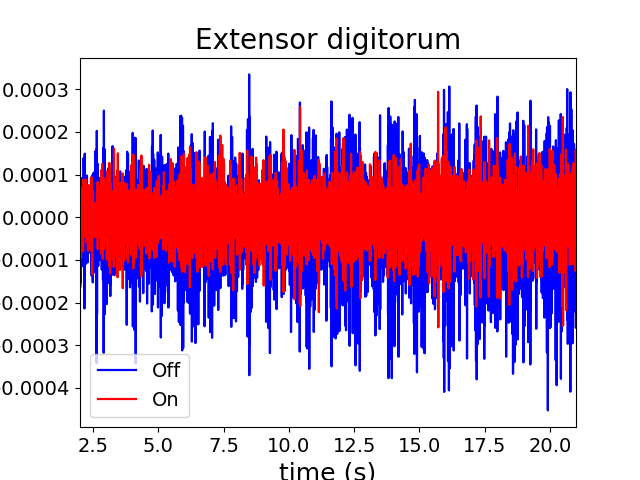

In [3]:
plt.figure()
plt.title('Flexor carpi radialis')
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(Data_off['Timestamp'],Data_off['Flexor carpi radialis'], 'b', label = 'Off')
plt.plot(Data_on['Timestamp'],Data_on['Flexor carpi radialis'], 'r', label = 'On')
plt.legend()
plt.xlim(min(Data_off['Timestamp']),max(Data_off['Timestamp']));

plt.figure()
plt.title('Extensor digitorum')
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(Data_off['Timestamp'],Data_off['Extensor digitorum'], 'b', label = 'Off')
plt.plot(Data_on['Timestamp'],Data_on['Extensor digitorum'], 'r', label = 'On')
plt.legend()
plt.xlim(min(Data_off['Timestamp']),max(Data_off['Timestamp']));

In [4]:
chunks_off = np.array_split(Data_off, 19)
chunks_on = np.array_split(Data_on, 19)
print(chunks_off)

[      Timestamp  Flexor carpi radialis  Extensor digitorum
0      2.000000               0.000126            0.000015
1      2.000794               0.000121            0.000046
2      2.001587               0.000085            0.000063
3      2.002381               0.000020            0.000057
4      2.003175              -0.000065            0.000029
...         ...                    ...                 ...
1256   2.996825              -0.000068           -0.000075
1257   2.997619              -0.000077           -0.000072
1258   2.998413              -0.000073           -0.000050
1259   2.999206              -0.000060           -0.000015
1260   3.000000              -0.000042            0.000026

[1261 rows x 3 columns],       Timestamp  Flexor carpi radialis  Extensor digitorum
1261   3.000794              -0.000023            0.000062
1262   3.001587              -0.000007            0.000084
1263   3.002381               0.000004            0.000088
1264   3.003175              

In [5]:
def count_MAV (chunk):
    
    array_flex = []
    array_flex = np.array(chunk['Flexor carpi radialis'])
    
    mav_flex = electromyography.getMAV(array_flex)
    collect_mav_flex.append(mav_flex)
    
    array_ext = []
    array_ext = np.array(chunk['Extensor digitorum'])
    
    mav_ext = electromyography.getMAV(array_ext)
    collect_mav_ext.append(mav_ext)
    
    return collect_mav_flex, collect_mav_ext

In [6]:
def count_RMS (chunk):
    
    array_flex = []
    array_flex = np.array(chunk['Flexor carpi radialis'])
    
    RMS_flex = electromyography.getRMS(array_flex)
    collect_RMS_flex.append(RMS_flex)
    
    array_ext = []
    array_ext = np.array(chunk['Extensor digitorum'])
    
    RMS_ext = electromyography.getRMS(array_ext)
    collect_RMS_ext.append(RMS_ext)
    
    return collect_RMS_flex, collect_RMS_ext

In [7]:
def count_WAMP (chunk):
    
    array_flex = []
    array_flex = np.array(chunk['Flexor carpi radialis'])
    
    WAMP_flex = electromyography.getWAMP(array_flex,threshold = 0)
    collect_WAMP_flex.append(WAMP_flex)
    
    array_ext = []
    array_ext = np.array(chunk['Extensor digitorum'])
    
    WAMP_ext = electromyography.getWAMP(array_ext,threshold = 0)
    collect_WAMP_ext.append(WAMP_ext)
    
    return collect_WAMP_flex, collect_WAMP_ext

In [8]:
def count_WL (chunk):
    
    array_flex = []
    array_flex = np.array(chunk['Flexor carpi radialis'])
    
    WL_flex = electromyography.getWL(array_flex)
    collect_WL_flex.append(WL_flex)
    
    array_ext = []
    array_ext = np.array(chunk['Extensor digitorum'])
    
    WL_ext = electromyography.getWL(array_ext)
    collect_WL_ext.append(WL_ext)
    
    return collect_WL_flex, collect_WL_ext

In [9]:
def count_ZC (chunk):
    
    array_flex = []
    array_flex = np.array(chunk['Flexor carpi radialis'])
    
    ZC_flex = electromyography.getZC(array_flex, threshold=0)
    collect_ZC_flex.append(ZC_flex)
    
    array_ext = []
    array_ext = np.array(chunk['Extensor digitorum'])
    
    ZC_ext = electromyography.getZC(array_ext, threshold=0)
    collect_ZC_ext.append(ZC_ext)
    
    return collect_ZC_flex, collect_ZC_ext

In [10]:
def count_SSC (chunk):
    
    array_flex = []
    array_flex = np.array(chunk['Flexor carpi radialis'])
    
    SSC_flex = electromyography.getSSC(array_flex, threshold=0)
    collect_SSC_flex.append(SSC_flex)
    
    array_ext = []
    array_ext = np.array(chunk['Extensor digitorum'])
    
    SSC_ext = electromyography.getSSC(array_ext, threshold=0)
    collect_SSC_ext.append(SSC_ext)
    
    return collect_SSC_flex, collect_SSC_ext

In [11]:
def count_VAR (chunk):
    
    array_flex = []
    array_flex = np.array(chunk['Flexor carpi radialis'])
    
    VAR_flex = electromyography.getVAR(array_flex)
    collect_VAR_flex.append(VAR_flex)
    
    array_ext = []
    array_ext = np.array(chunk['Extensor digitorum'])
    
    VAR_ext = electromyography.getVAR(array_ext)
    collect_VAR_ext.append(VAR_ext)
    
    return collect_VAR_flex, collect_VAR_ext

In [12]:
def count_MAV1 (chunk):
    
    array_flex = []
    array_flex = np.array(chunk['Flexor carpi radialis'])
    
    MAV1_flex = electromyography.getMAV1(array_flex)
    collect_MAV1_flex.append(MAV1_flex)
    
    array_ext = []
    array_ext = np.array(chunk['Extensor digitorum'])
    
    MAV1_ext = electromyography.getMAV1(array_ext)
    collect_MAV1_ext.append(MAV1_ext)
    
    return collect_MAV1_flex, collect_MAV1_ext

In [13]:
def count_MAV2 (chunk):
    
    array_flex = []
    array_flex = np.array(chunk['Flexor carpi radialis'])
    
    MAV2_flex = electromyography.getMAV2(array_flex)
    collect_MAV2_flex.append(MAV2_flex)
    
    array_ext = []
    array_ext = np.array(chunk['Extensor digitorum'])
    
    MAV2_ext = electromyography.getMAV2(array_ext)
    collect_MAV2_ext.append(MAV2_ext)
    
    return collect_MAV2_flex, collect_MAV2_ext

In [14]:
def count_entropy (chunk):
    delay_flex, _ = nk.complexity_delay(chunk['Flexor carpi radialis'], show=False)
    ApEn_flex, _ = nk.entropy_approximate(chunk['Flexor carpi radialis'], delay=delay_flex, dimension = 3)
    SampEn_flex, _ = nk.entropy_sample(chunk['Flexor carpi radialis'], delay=delay_flex, dimension = 3)
    apen_flex.append(ApEn_flex)
    sampen_flex.append(SampEn_flex)
    
    delay_ext, _ = nk.complexity_delay(chunk['Extensor digitorum'], show=False)
    ApEn_ext, _ = nk.entropy_approximate(chunk['Extensor digitorum'], delay=delay_ext, dimension = 3)
    SampEn_ext, _ = nk.entropy_sample(chunk['Extensor digitorum'], delay=delay_ext, dimension = 3)
    apen_ext.append(ApEn_ext)
    sampen_ext.append(SampEn_ext)
    
    return apen_flex, apen_ext, sampen_flex, sampen_ext

In [15]:
collect_mav_flex = []
collect_mav_ext = []
collect_RMS_flex = []
collect_RMS_ext = []
collect_WAMP_flex = []
collect_WAMP_ext = []
collect_WL_flex = []
collect_WL_ext = []
collect_ZC_flex = []
collect_ZC_ext = []
collect_SSC_flex = []
collect_SSC_ext = []
collect_VAR_flex = []
collect_VAR_ext = []
collect_MAV1_flex = []
collect_MAV1_ext = []
collect_MAV2_flex = []
collect_MAV2_ext = []
apen_flex = []
apen_ext = []
sampen_flex = []
sampen_ext = []

for chunk in chunks_off:
    count_MAV(chunk)
    count_RMS(chunk)
    count_WAMP(chunk)
    count_WL(chunk)
    count_ZC(chunk)
    count_SSC(chunk)
    count_VAR(chunk)
    count_MAV1(chunk)
    count_MAV2(chunk)
    count_entropy(chunk)

print('MAV Flexor carpi radialis off', np.mean(collect_mav_flex))
print('MAV Extensor digitorum off', np.mean(collect_mav_ext))

print('RMS Flexor carpi radialis off', np.mean(collect_RMS_flex))
print('RMS Extensor digitorum off', np.mean(collect_RMS_ext))

print('WAMP Flexor carpi radialis off', np.mean(collect_WAMP_flex))
print('WAMP Extensor digitorum off', np.mean(collect_WAMP_ext))

print('WL Flexor carpi radialis off', np.mean(collect_WL_flex))
print('WL Extensor digitorum off', np.mean(collect_WL_ext))

print('ZC Flexor carpi radialis off', np.mean(collect_ZC_flex))
print('ZC Extensor digitorum off', np.mean(collect_ZC_ext))

print('SSC Flexor carpi radialis off', np.mean(collect_SSC_flex))
print('SSC Extensor digitorum off', np.mean(collect_SSC_ext))

print('VAR Flexor carpi radialis off', np.mean(collect_VAR_flex))
print('VAR Extensor digitorum off', np.mean(collect_VAR_ext))

print('MAV1 Flexor carpi radialis off', np.mean(collect_MAV1_flex))
print('MAV1 Extensor digitorum off', np.mean(collect_MAV1_ext))

print('MAV2 Flexor carpi radialis off', np.mean(collect_MAV2_flex))
print('MAV2 Extensor digitorum off', np.mean(collect_MAV2_ext))

print('ApEn Flexor carpi radialis off', np.mean(apen_flex))
print('ApEn Extensor digitorum off', np.mean(apen_ext))

print('SampEn Flexor carpi radialis off', np.mean(sampen_flex))
print('SampEn Extensor digitorum off', np.mean(sampen_ext))

MAV Flexor carpi radialis off 4.823568688638362e-05
MAV Extensor digitorum off 6.69885101852934e-05
RMS Flexor carpi radialis off 7.69960369601023e-05
RMS Extensor digitorum off 8.817621423266403e-05
WAMP Flexor carpi radialis off 624.7894736842105
WAMP Extensor digitorum off 609.8947368421053
WL Flexor carpi radialis off 0.019475645045388224
WL Extensor digitorum off 0.030165571989683657
ZC Flexor carpi radialis off 124.26315789473684
ZC Extensor digitorum off 144.26315789473685
SSC Flexor carpi radialis off 84.57894736842105
SSC Extensor digitorum off 100.3157894736842
VAR Flexor carpi radialis off 6.131757761885238e-09
VAR Extensor digitorum off 7.931021031436117e-09
MAV1 Flexor carpi radialis off 3.448097647088167e-05
MAV1 Extensor digitorum off 4.89738190886087e-05
MAV2 Flexor carpi radialis off 1.939335193316515e-05
MAV2 Extensor digitorum off 3.027880126586343e-05
ApEn Flexor carpi radialis off 0.7151036604951614
ApEn Extensor digitorum off 0.7526363734502898
SampEn Flexor carpi

In [16]:
collect_mav_flex = []
collect_mav_ext = []
collect_RMS_flex = []
collect_RMS_ext = []
collect_WAMP_flex = []
collect_WAMP_ext = []
collect_WL_flex = []
collect_WL_ext = []
collect_ZC_flex = []
collect_ZC_ext = []
collect_SSC_flex = []
collect_SSC_ext = []
collect_VAR_flex = []
collect_VAR_ext = []
collect_MAV1_flex = []
collect_MAV1_ext = []
collect_MAV2_flex = []
collect_MAV2_ext = []
apen_flex = []
apen_ext = []
sampen_flex = []
sampen_ext = []

for chunk in chunks_on:
    count_MAV(chunk)
    count_RMS(chunk)
    count_WAMP(chunk)
    count_WL(chunk)
    count_ZC(chunk)
    count_SSC(chunk)
    count_VAR(chunk)
    count_MAV1(chunk)
    count_MAV2(chunk)
    count_entropy(chunk)

print('MAV Flexor carpi radialis on', np.mean(collect_mav_flex))
print('MAV Extensor digitorum on', np.mean(collect_mav_ext))

print('RMS Flexor carpi radialis on', np.mean(collect_RMS_flex))
print('RMS Extensor digitorum on', np.mean(collect_RMS_ext))

print('WAMP Flexor carpi radialis on', np.mean(collect_WAMP_flex))
print('WAMP Extensor digitorum on', np.mean(collect_WAMP_ext))

print('WL Flexor carpi radialis on', np.mean(collect_WL_flex))
print('WL Extensor digitorum on', np.mean(collect_WL_ext))

print('ZC Flexor carpi radialis on', np.mean(collect_ZC_flex))
print('ZC Extensor digitorum on', np.mean(collect_ZC_ext))

print('SSC Flexor carpi radialis on', np.mean(collect_SSC_flex))
print('SSC Extensor digitorum on', np.mean(collect_SSC_ext))

print('VAR Flexor carpi radialis on', np.mean(collect_VAR_flex))
print('VAR Extensor digitorum on', np.mean(collect_VAR_ext))

print('MAV1 Flexor carpi radialis on', np.mean(collect_MAV1_flex))
print('MAV1 Extensor digitorum on', np.mean(collect_MAV1_ext))

print('MAV2 Flexor carpi radialis on', np.mean(collect_MAV2_flex))
print('MAV2 Extensor digitorum on', np.mean(collect_MAV2_ext))

print('ApEn Flexor carpi radialis on', np.mean(apen_flex))
print('ApEn Extensor digitorum on', np.mean(apen_ext))

print('SampEn Flexor carpi radialis on', np.mean(sampen_flex))
print('SampEn Extensor digitorum on', np.mean(sampen_ext))

MAV Flexor carpi radialis on 2.9434338069979214e-05
MAV Extensor digitorum on 4.002599437052611e-05
RMS Flexor carpi radialis on 4.202813910811893e-05
RMS Extensor digitorum on 5.2240544149110856e-05
WAMP Flexor carpi radialis on 635.1052631578947
WAMP Extensor digitorum on 632.421052631579
WL Flexor carpi radialis on 0.011801897195190352
WL Extensor digitorum on 0.016110085476797764
ZC Flexor carpi radialis on 127.0
ZC Extensor digitorum on 129.21052631578948
SSC Flexor carpi radialis on 78.89473684210526
SSC Extensor digitorum on 78.10526315789474
VAR Flexor carpi radialis on 1.7950852656956392e-09
VAR Extensor digitorum on 2.772097529440522e-09
MAV1 Flexor carpi radialis on 2.1962330355913216e-05
MAV1 Extensor digitorum on 3.011728527399029e-05
MAV2 Flexor carpi radialis on 1.3672548349131461e-05
MAV2 Extensor digitorum on 1.9649070256495782e-05
ApEn Flexor carpi radialis on 0.7246451195831077
ApEn Extensor digitorum on 0.7280310738627214
SampEn Flexor carpi radialis on 1.1769698210